**Loading the required packages for the algorithm**

In [ ]:
import warnings
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten
from tensorflow.keras import optimizers
from sklearn import preprocessing

In [ ]:
from google.colab import drive

## Loading the required file 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import h5py
hf5=h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5','r')
hf5.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## Read the data from the h5py file and understand the train/test splits 

In [ ]:
X_train=hf5['X_train'][:]
y_train=hf5['y_train'][:]
x_test=hf5['X_test'][:]
y_test=hf5['y_test'][:]
x_val=hf5['X_val'][:]
y_val=hf5['y_val'][:]

## Visualizing the dataset

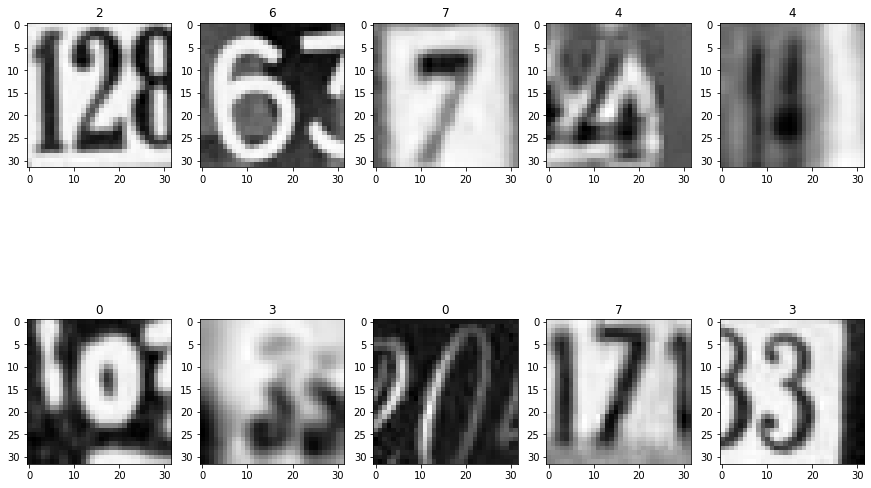

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.title(y_train[i])
  #plt.tight_layout()

## Checking the shape of the tarining and test dataset

In [ ]:
X_train.shape

(42000, 32, 32)

In [ ]:
x_test.shape

(18000, 32, 32)

In [ ]:
x_val.shape

(60000, 32, 32)

In [ ]:
y_val.shape

(60000,)

In [ ]:
y_train.shape

(42000,)

In [ ]:
y_test.shape

(18000,)

In [ ]:
y_test.view()

array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

## Reshaping the training data and test data

In [ ]:
X_train = X_train.reshape((X_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_val=x_val.reshape((x_val.shape[0],-1))

## One hot encode the labels for train and test data

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val=to_categorical(y_val)

In [ ]:
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape,x_val.shape,y_val.shape)

(42000, 1024) (18000, 1024) (42000, 10) (18000, 10) (60000, 1024) (60000, 10)


## Normalizing the test and train data

In [ ]:
X_train = preprocessing.normalize(X_train)
x_test = preprocessing.normalize(x_test)
x_val=preprocessing.normalize(x_val)

## *Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax 
## *Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation

### (Basic NN model)

In [ ]:
def mlp_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.Adam(lr = 0.0009)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()


## Fit and evaluate the model. Print the loss and accuracy for the test data 

In [ ]:
history=model.fit(X_train, y_train,validation_data=(x_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 2.2775 - accuracy: 0.1133 - val_loss: 2.1825 - val_accuracy: 0.1521
Epoch 2/100
210/210 [==============================] - 1s 6ms/step - loss: 1.9992 - accuracy: 0.2554 - val_loss: 1.8522 - val_accuracy: 0.3261
Epoch 3/100
210/210 [==============================] - 1s 7ms/step - loss: 1.7586 - accuracy: 0.3587 - val_loss: 1.6762 - val_accuracy: 0.3968
Epoch 4/100
210/210 [==============================] - 2s 7ms/step - loss: 1.6427 - accuracy: 0.4139 - val_loss: 1.5959 - val_accuracy: 0.4315
Epoch 5/100
210/210 [==============================] - 1s 7ms/step - loss: 1.5814 - accuracy: 0.4420 - val_loss: 1.5536 - val_accuracy: 0.4511
Epoch 6/100
210/210 [==============================] - 1s 7ms/step - loss: 1.5341 - accuracy: 0.4660 - val_loss: 1.5203 - val_accuracy: 0.4719
Epoch 7/100
210/210 [==============================] - 1s 6ms/step - loss: 1.4899 - accuracy: 0.4835 - val_loss: 1.4376 - val_accuracy: 0.5117

In [ ]:
results = model.evaluate(x_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.7890 - accuracy: 0.7597


In [ ]:
print('Test accuracy: ', results[1])

Test accuracy:  0.7596666812896729


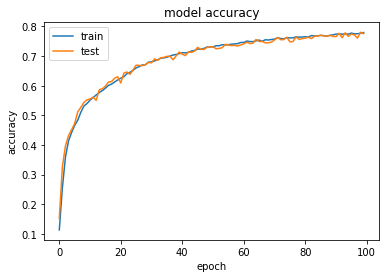

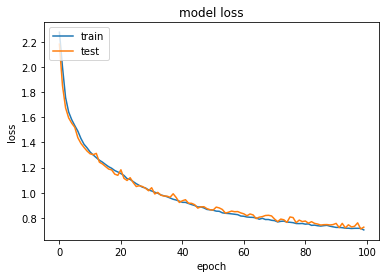

In [ ]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

> The acuracy was found to be 75 in basic Neural network model.\
Required graphs were also plotted.

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

## Model building using BatchNormalization and Dropout method 

In [ ]:
def mlp_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.0009)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history1=model.fit(X_train, y_train,validation_data=(x_val,y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2202 - accuracy: 0.2045 - val_loss: 2.2366 - val_accuracy: 0.2051
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 1.6857 - accuracy: 0.4016 - val_loss: 1.8684 - val_accuracy: 0.3447
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 1.4532 - accuracy: 0.5030 - val_loss: 1.5179 - val_accuracy: 0.4836
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 1.3251 - accuracy: 0.5572 - val_loss: 1.1585 - val_accuracy: 0.6262
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 1.2430 - accuracy: 0.5898 - val_loss: 1.1722 - val_accuracy: 0.6249
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 1.1724 - accuracy: 0.6203 - val_loss: 1.2061 - val_accuracy: 0.6024
Epoch 7/100
210/210 [==============================] - 2s 8ms/step - loss: 1.1253 - accuracy: 0.6374 - val_loss: 1.2435 - val_accuracy: 0.5

In [ ]:
results = model.evaluate(x_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.8063


In [ ]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.6292060613632202, 0.8062777519226074]


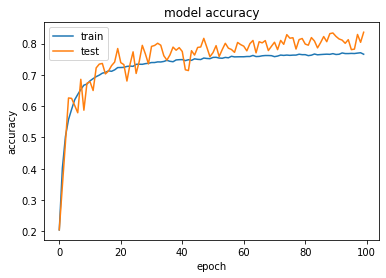

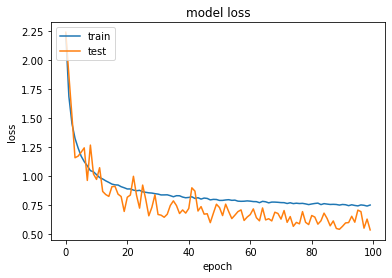

In [ ]:
#summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

> The accuracy was found to be 80 using batch normalization and dropout methods.\
The required graphs were also plotted.